# Imports

In [1]:
# Basis-Libraries
import numpy as np

# Audioverarbeitung
import soundfile as sf               # Zum Einlesen und Schreiben von Audiodateien (z.B. *.wav)
from IPython.display import Audio    # Für die Wiedergabe von Audiodateien direkt im Jupyter Notebook
import librosa                       # Bibliothek zur Musik- und Audioanalyse (z.B. Laden, Feature-Extraktion)
import librosa.display               # Visualisierungsfunktionen für Audiodaten (z.B. Spektrogramme, Wellenformen)

# Visualisierung
import matplotlib.pyplot as plt      # Plot-Bibliothek für Diagramme, Signale, Bilder etc.
import matplotlib.image as mpimg     # Modul zum Einlesen von Bilddateien (z.B. JPEG, PNG) für plt
import seaborn as sns                # Erweiterte Visualisierungsbibliothek auf Basis von matplotlib mit schöneren Standardlayouts

# Signalverarbeitung & FFT
from scipy.signal import find_peaks  # Findet lokale Maxima in 1D-Daten (z.B. Peaks im Spektrum)
from scipy.fft import (
    fft,         # 1D-FFT: schnelle Fourier-Transformation für 1D-Signale (z.B. Audio)
    fft2,        # 2D-FFT: Fourier-Transformation für 2D-Daten (z.B. Bilder)
    fftfreq,     # Frequenzachsen-Werte passend zur FFT (für Achsenbeschriftung/Analyse)
    fftshift,    # Verschiebt die Nullfrequenz in die Bildmitte (z.B. für Darstellung)
    ifftshift,   # Rückverschiebung: Macht fftshift rückgängig (vor Inverse-FFT)
    ifft2        # Inverse 2D-FFT: Zurück von Frequenz- in Bild-/Raumdarstellung
)

# Aufgabe 1

## 1 a) Fourier-Komponenten

### Aufgabe 

Implementieren Sie mit NumPy eine Methode zur Berechnung der $k$-ten Fourier-Komponente einer Funktion, gegeben durch Arrays $x$ und $y$, mithilfe der Trapezregel (`np.trapezoid`).

### Mathematischer Hintergrund

Die Fourier-Koeffizienten $c_k$ beschreiben die Amplituden der harmonischen Bestandteile einer periodischen Funktion $f(x)$. Für eine Funktion, die auf dem Intervall $[-L, L]$ definiert ist und periodisch mit Periode $2L$ fortgesetzt wird, berechnen sich die Koeffizienten nach folgender Formel:

$$c_k = \frac{1}{2L} \int_{-L}^{L} f(x) \cdot e^{-i k \pi x / L} \, dx \quad \text{für alle } k \in \mathbb{Z}
$$

Diese Formulierung ist äquivalent zur klassischen Fourier-Reihe, jedoch mit einer leicht anderen Skalierung der Exponentialfunktion. Sie ist besonders geeignet, wenn man das Intervall $[-L, L]$ direkt verwendet und auf eine numerische Umsetzung mit festen Stützstellen zielt.

### Umsetzung in Python

Die Berechnung dieses Integrals erfolgt numerisch mit der Trapezregel. Die Funktion fourier_komponente(...) verwendet NumPy und erwartet:
- ein Array $x$ mit den Stützstellen im Intervall $[-L, L]$
- ein Array $y$ mit den entsprechenden Funktionswerten $f(x)$
- einen ganzzahligen Index $k$ der Fourier-Komponente
- den Parameter $L$, also die halbe Periodenlänge

In [2]:
def fourier_komponente(x, y, k, L):
    """
    Berechnet die k-te Fourier-Komponente einer Funktion f(x), gegeben durch
    die Stützstellen x und Funktionswerte y = f(x), mit der Trapezregel.

    Parameters:
        x (ndarray): Array mit Stützstellen im Intervall [-L, L]
        y (ndarray): Array mit Funktionswerten f(x)
        k (int): Index der Fourier-Komponente (k ∈ ℤ)
        L (float): Halbe Periodenlänge des Intervalls (z.B. bei [-3, 3] ist L = 3)

    Returns:
        c_k (complex): k-te Fourier-Komponente
    """
    integrand = y * np.exp(-1j * k * np.pi * x / L)
    c_k = (1 / (2 * L)) * np.trapezoid(integrand, x)
    return c_k

## 1 b) Fourier Approximation

### Aufgabe

Implementieren Sie mit numpy eine Methode zur Berechnung der Fourier-Approximation $f_{app}$ mit einer gegebenen Anzahl ($m$) von Frequenzkomponenten.

Mathematischer Hintergrund

Die Fourier-Approximation $f_{\text{app}}(x)$ ist eine Summe komplexer Exponentialfunktionen, die eine periodische Funktion $f(x)$ auf dem Intervall $[-L, L]$ durch $2m + 1$ Fourier-Komponenten annähert. Die Approximation lautet:

$$
f_{\text{app}}(x) = \sum_{k=-m}^{m} c_k \cdot e^{i k \pi x / L}
$$

wobei die Koeffizienten $c_k$ durch die zuvor definierte Formel berechnet werden:

$$
c_k = \frac{1}{2L} \int_{-L}^{L} f(x) \cdot e^{-i k \pi x / L} \, dx
$$

Durch die Summation über positive und negative Frequenzen entsteht eine symmetrische Rekonstruktion, die sowohl die gleichanteilige als auch die schwingenden Anteile der Funktion berücksichtigt.

### Umsetzung in Python

Die folgende Funktion `fourier_approximation(...)` berechnet die Näherung $f_{\text{app}}(x)$ aus den diskreten Werten $x$ und $f(x) = y$. Für jede Frequenzkomponente $k \in [-m, m]$ wird der entsprechende Fourier-Koeffizient berechnet und zum Approximationssignal addiert.

In [3]:
def fourier_approximation(x, y, m, L):
    """
    Berechnet die Fourier-Approximation f_app(x) mit 2m + 1 Komponenten.

    Parameters:
        x (ndarray): Stützstellen x im Intervall [-L, L]
        y (ndarray): Funktionswerte f(x)
        m (int): Maximale Frequenzkomponente (Symmetrisch um 0)
        L (float): Halbe Periodenlänge

    Returns:
        f_app (ndarray): Approximierte Funktion an den Punkten x
    """
    f_app = np.zeros_like(x, dtype=complex)
    for k in range(-m, m + 1):
        c_k = fourier_komponente(x, y, k, L)
        f_app += c_k * np.exp(1j * k * np.pi * x / L)
    return np.real(f_app)

## 1c) Näherung der Funktion $f_1(x)$ mit Fourier-Approximation

### Aufgabe

Nähern Sie die Funktion $f_1(x) = \frac{1}{e^x + e^{-x}} = \mathrm{sech}(x)$ auf dem Intervall $[-3, 3]$ mit verschiedenen Anzahlen von Komponenten $(2m + 1)$. Plotten Sie den Vergleich zur Originalfunktion $f(x)$.

### Ziel

Ziel dieser Teilaufgabe ist es, den Einfluss der Anzahl der verwendeten Frequenzkomponenten auf die Qualität der Fourier-Approximation zu untersuchen. Die zu approximierende Funktion $f_1(x)$ ist glatt und fällt rasch gegen Null – sie eignet sich daher gut zur Demonstration der Konvergenzverhalten der Fourier-Reihe.

### Visualisierung der Approximation für verschiedene $m$

Die folgende Grafik zeigt die Fourier-Approximationen für $m = 1, 2, 3, 4, 5, 7, 10, 20$ im Vergleich zur Originalfunktion $f_1(x)$. Die Approximation wurde mit der zuvor implementierten Methode `fourier_approximation(...)` berechnet. 

Die Plots sind in einem übersichtlichen Grid-Layout dargestellt:

- Die gestrichelte schwarze Linie zeigt jeweils die Originalfunktion $\mathrm{sech}(x)$.
- Die farbige Kurve zeigt die jeweilige Fourier-Näherung mit $2m + 1$ Komponenten.
- Es ist deutlich zu erkennen, dass die Approximation mit zunehmendem $m$ immer besser wird – besonders in der Mitte des Intervalls.

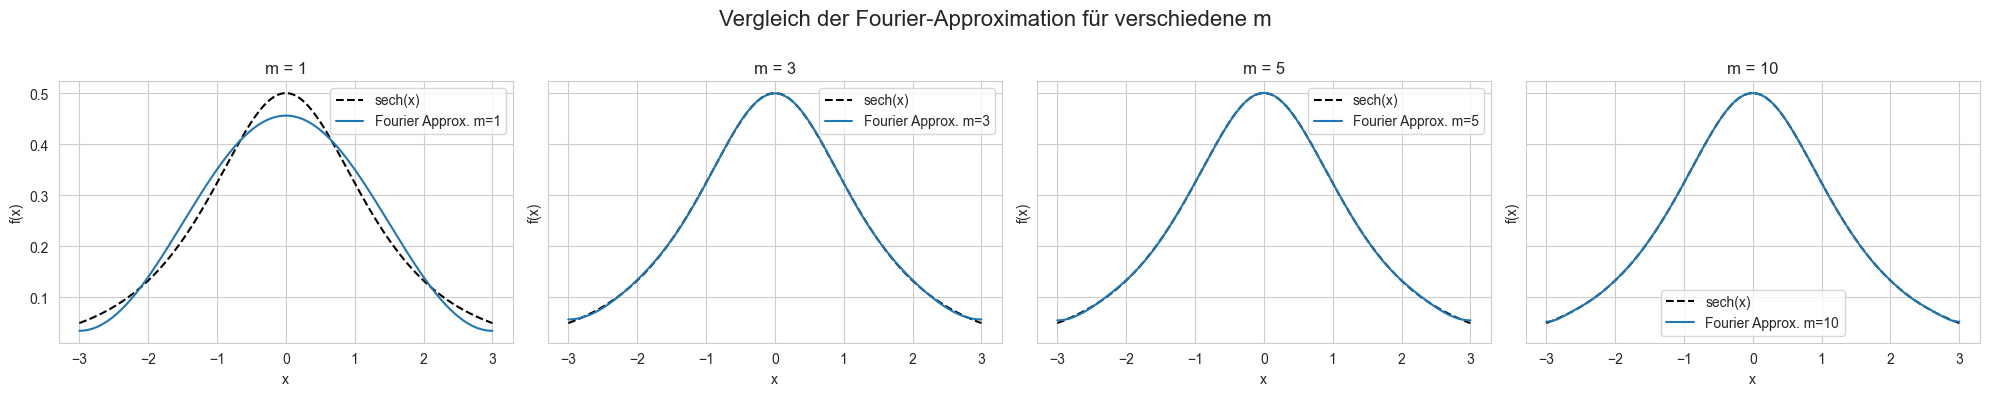

In [4]:
def f1(x):
    return 1 / (np.exp(x) + np.exp(-x))

def plot_fourier_approximation(
        f, 
        L=3, 
        N=600, 
        m_values=[1, 3, 5, 10], 
        f_label="Original f(x)", 
        cols=4,
        top=.8):
    """
    Plottet die Fourier-Approximation einer Funktion f(x) für verschiedene m-Werte in einem Grid.

    Parameters:
        f (callable): Die zu approximierende Funktion
        L (float): Halbe Periodenlänge
        N (int): Anzahl der Stützstellen
        m_values (list): Liste von m-Werten für die Approximation
        f_label (str): Beschriftung der Originalfunktion im Plot
    """
    x = np.linspace(-L, L, N)
    y = f(x)

    num_plots = len(m_values)
    rows = (num_plots + cols - 1) // cols  # Rundet auf

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
    axes = axes.flatten()  # Zum einfachen Zugriff auf alle Subplots

    for i, m in enumerate(m_values):
        f_app = fourier_approximation(x, y, m, L)
        ax = axes[i]
        ax.plot(x, y, label=f_label, color="black", linestyle="--")
        ax.plot(x, f_app, label=f"Fourier Approx. m={m}")
        ax.set_title(f"m = {m}")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        ax.grid(True)
        ax.legend()

    # Verstecke nicht genutzte Subplots (falls m_values < rows*cols)
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    fig.suptitle("Vergleich der Fourier-Approximation für verschiedene m", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=top)  # Platz für Suptitle
    plt.show()


        
plot_fourier_approximation(lambda x: 1 / (np.exp(x) + np.exp(-x)), f_label="sech(x)")

## 1d) Bestimmung der minimalen Anzahl von Komponenten

### Aufgabe

Bestimmen Sie die Anzahl der Fourier-Komponenten $m$, die nötig ist, um eine Approximation mit einem relativen Fehler von höchstens 0{,}1% zu erreichen.

### Fehlermass

Der relative Fehler wird über die normierte Differenz der Funktionswerte berechnet:

$$
\text{rel. Fehler} = \frac{ \| f_{\text{orig}} - f_{\text{approx}} \|_2 }{ \| f_{\text{orig}} \|_2 }
$$

Dabei bezeichnet $\|\cdot\|_2$ die euklidische Norm (L2-Norm), ein Standardmass für die Genauigkeit numerischer Approximationen.

### Vorgehen

Zur Bestimmung des minimal notwendigen $m$ wird die Funktion `finde_minimales_m(...)` verwendet. Sie berechnet sukzessive Fourier-Approximationen für $m = 1$ bis $m_{\text{max}}$ und prüft, wann der relative Fehler unter die Zielgrenze von 0{,}1 % fällt.

Die Funktion gibt das gefundene minimale $m$ zurück und zeigt optional den Fehlerverlauf grafisch an. Dies liefert einen guten Eindruck von der Konvergenzgeschwindigkeit der Fourier-Reihe.

Minimales m mit Fehler < 0.10%: m = 13


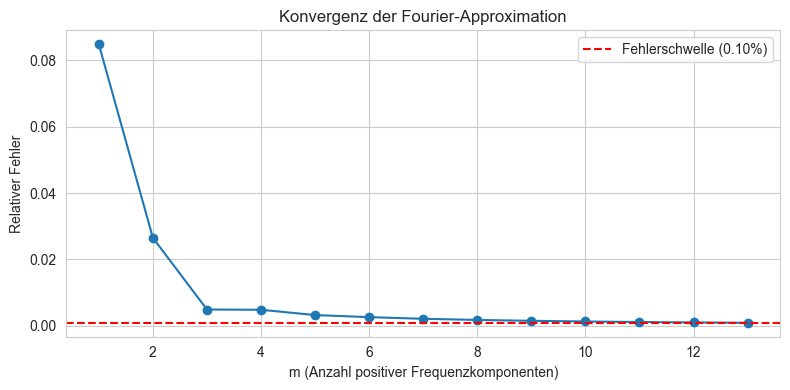

In [5]:
def finde_minimales_m(f, L=3, N=600, target_error=0.001, m_max=100, plot=True):
    """
    Bestimmt die kleinste Anzahl an Fourier-Komponenten m, sodass der relative Fehler
    der Fourier-Approximation unterhalb eines gegebenen Schwellenwerts liegt.

    Parameters:
        f (callable): Die zu approximierende Funktion f(x)
        L (float): Halbe Periodenlänge des Intervalls [-L, L]
        N (int): Anzahl der Stützstellen
        target_error (float): Fehlerschwelle (z. B. 0.001 für 0.1%)
        m_max (int): Maximales m, das getestet werden soll
        plot (bool): Ob der Fehlerverlauf geplottet werden soll

    Returns:
        m_opt (int): Kleinstes m mit Fehler < target_error
    """
    x = np.linspace(-L, L, N)
    y = f(x)

    def relative_fehler(f_orig, f_approx):
        return np.linalg.norm(f_orig - f_approx) / np.linalg.norm(f_orig)

    fehler_liste = []
    m_liste = []

    m_opt = None
    for m in range(1, m_max + 1):
        f_app = fourier_approximation(x, y, m, L)
        fehler = relative_fehler(y, f_app)
        fehler_liste.append(fehler)
        m_liste.append(m)
        if fehler < target_error and m_opt is None:
            m_opt = m
            break

    if m_opt is not None:
        print(f"Minimales m mit Fehler < {target_error * 100:.2f}%: m = {m_opt}")
    else:
        print("Kein m mit genügend kleinem Fehler gefunden.")

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(m_liste, fehler_liste, marker='o')
        plt.axhline(y=target_error, color='r', linestyle='--', label=f'Fehlerschwelle ({target_error*100:.2f}%)')
        plt.xlabel("m (Anzahl positiver Frequenzkomponenten)")
        plt.ylabel("Relativer Fehler")
        plt.title("Konvergenz der Fourier-Approximation")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return m_opt

_ = finde_minimales_m(f1)

Minimales m mit Fehler < 0.10%: m = 13


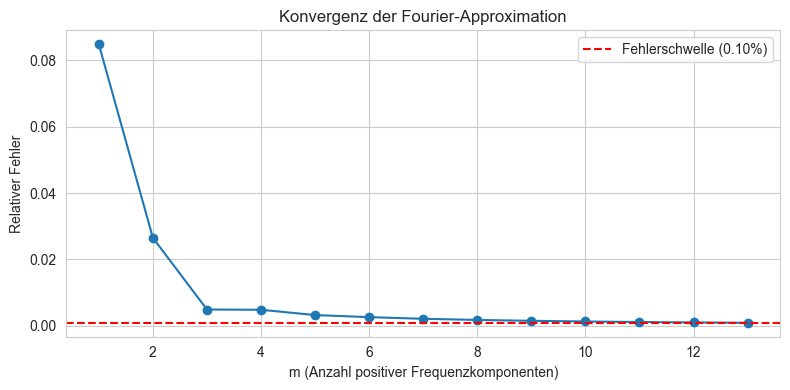

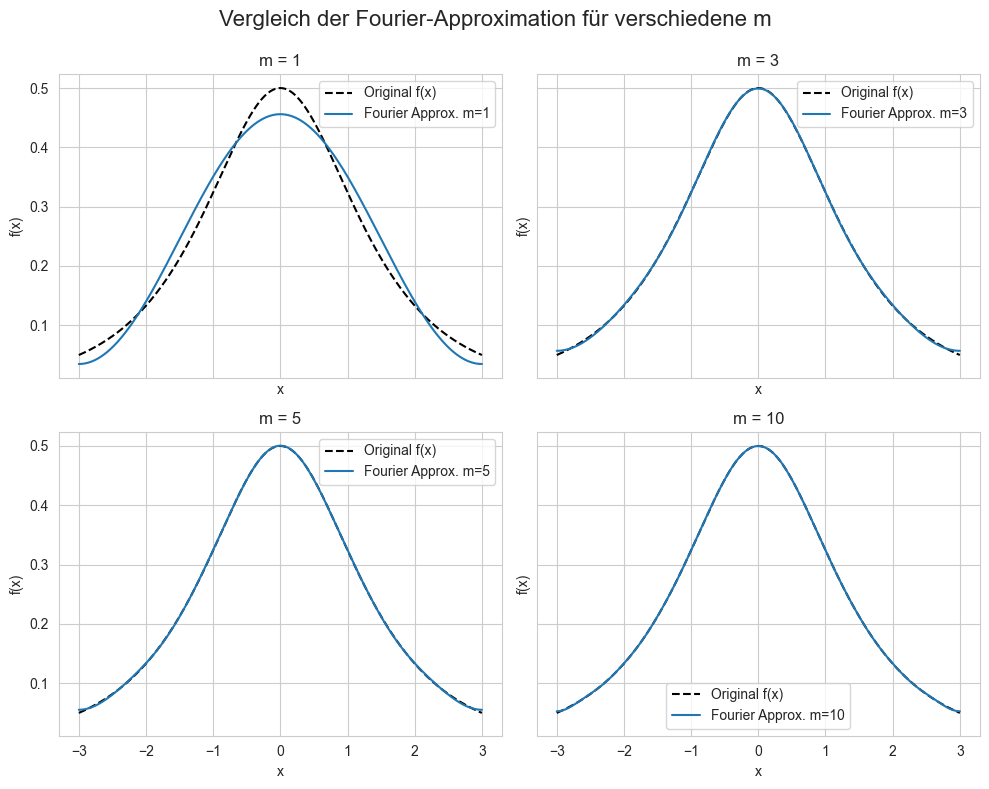

In [6]:
_ = finde_minimales_m(f1)

plot_fourier_approximation(f1, m_values=[1, 3, 5, 10], cols=2, top=.9)

## 1e) Fourier-Approximation der Funktionen $f_2(x) = e^x$ und $f_3(x) = e^{|x|}$

### Aufgabe

Versuchen Sie, die Funktionen
- $f_2(x) = e^x$ und
- $f_3(x) = e^{|x|}$

auf dem Intervall $[-3, 3]$ mit einer Fourier-Approximation so zu nähern, dass der relative Fehler unter 0{,}1% bleibt.

Verwenden Sie dabei dieselbe Methode wie zuvor (Aufgabe 1d), also die Funktion `finde_minimales_m(...)`.

### Ergebnisse

- Für $f_2(x) = e^x$ wurde kein Wert von $m$ bis $100$ gefunden, der zu einem relativen Fehler unter 0{,}1% führt.
- Für $f_3(x) = e^{|x|}$ wurde bei $m = 93$ der Ziel-Fehler von 0{,}1% unterschritten.
    

### Interpretation & Vergleich

Diese Ergebnisse zeigen, wie stark die mathematischen Eigenschaften einer Funktion die Konvergenz der Fourier-Reihe beeinflussen: 

#### $f_2(x) = e^x$

- Diese Funktion ist nicht periodisch, nicht symmetrisch und monoton wachsend.
- Beim Übergang von $x = L$ nach $x = -L$ (also beim Umsprung der periodischen Fortsetzung) entsteht ein großer Sprung in den Funktionswerten.
- Dieser Sprung führt zu starken Diskontinuitäten in der periodischen Fortsetzung, wodurch viele hochfrequente Anteile nötig sind, um die Funktion zu approximieren.
- Innerhalb des getesteten Bereichs ($m \leq 100$) reicht die Approximation deshalb nicht aus, um den Ziel-Fehler zu unterschreiten.

#### $f_3(x) = e^{|x|}$

- Diese Funktion ist symmetrisch um $x = 0$ und fällt zu beiden Seiten hin exponentiell ab.
- Zwar ist sie an der Stelle $x = 0$ nicht differenzierbar, aber ihre periodische Fortsetzung ist insgesamt wesentlich glatter als die von $f_2$.
- Dadurch kann sie bereits mit moderater Anzahl von Frequenzkomponenten (hier: $m = 93$) gut approximiert werden.

### Fazit

Der Vergleich zeigt deutlich:
- Funktionen mit Sprungstellen, starker Asymmetrie oder nicht-periodischem Verhalten (wie $e^x$) sind mit der Fourier-Reihe nur sehr langsam und schlecht approximierbar.
- Funktionen, die symmetrisch, glatt oder zumindest stetig sind (wie $e^{|x|}$), lassen sich mit deutlich weniger Komponenten gut annähern.
- Die Glattheit und Periodizität der Funktion (bzw. ihrer periodischen Fortsetzung) sind entscheidend für die Konvergenzgeschwindigkeit der Fourier-Approximation.

Kein m mit genügend kleinem Fehler gefunden.


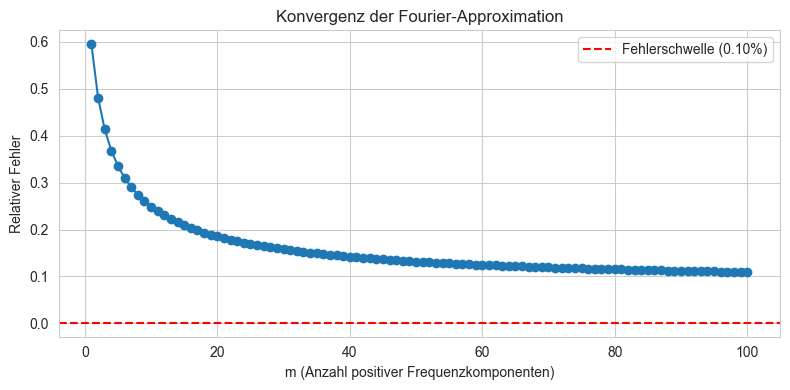

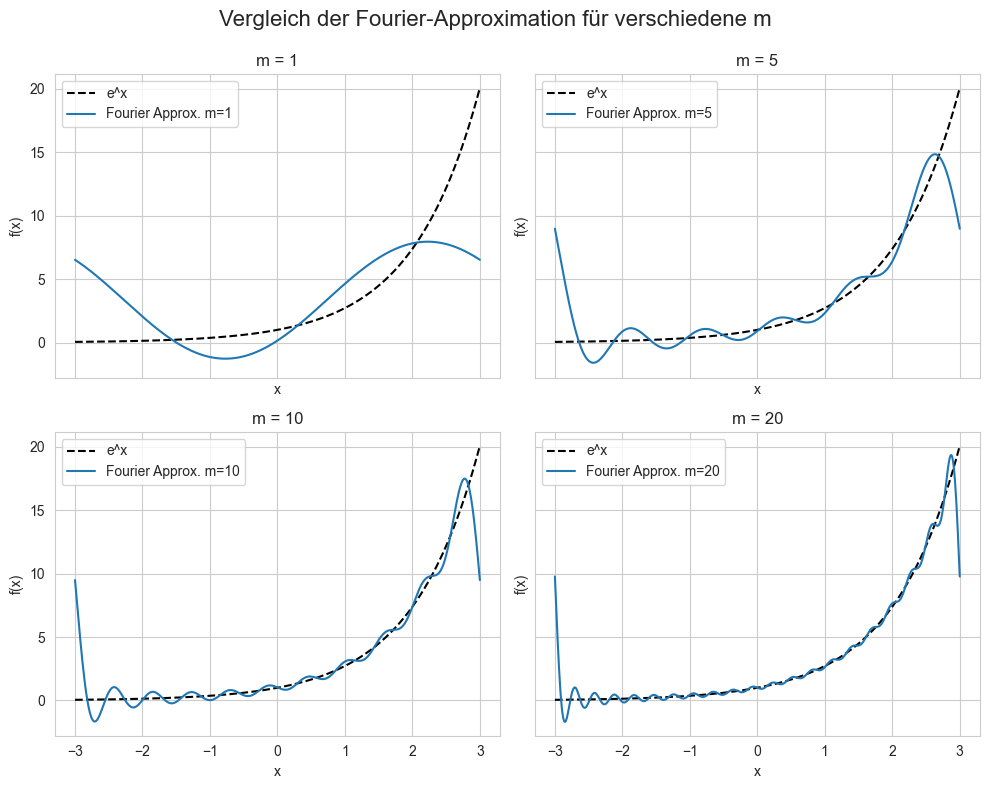

Minimales m mit Fehler < 0.10%: m = 93


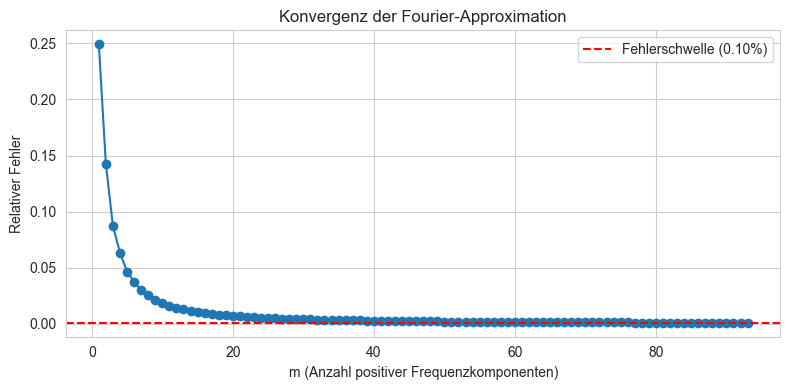

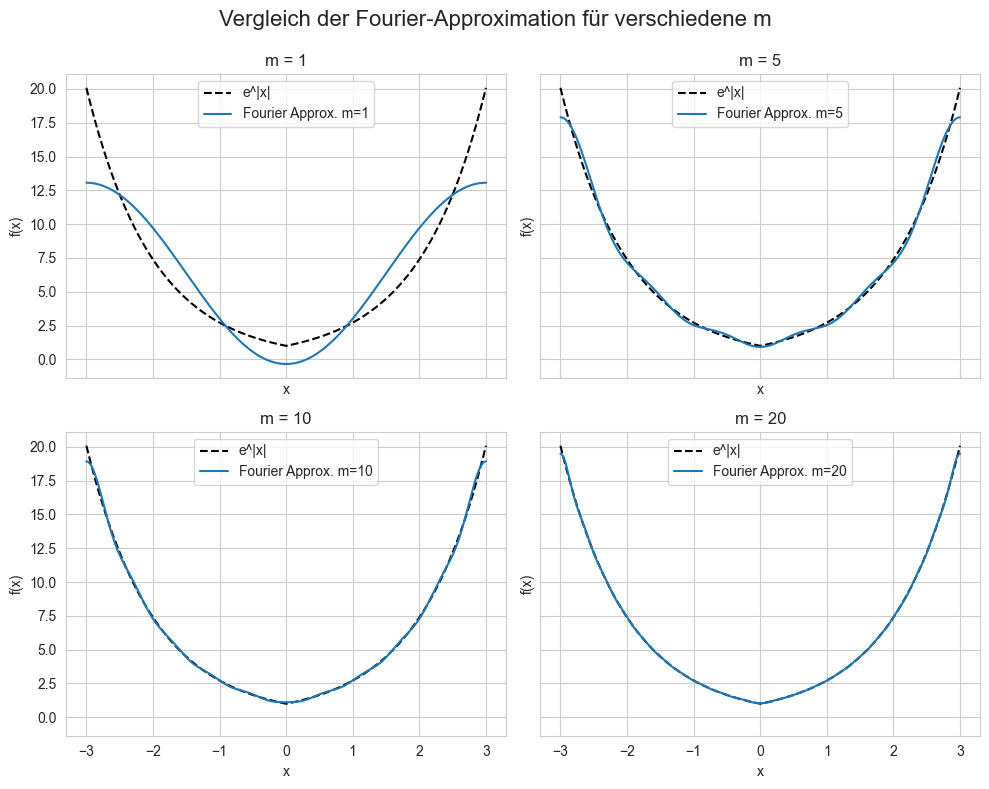

In [7]:
def f2(x):
    return np.exp(x)
    
def f3(x):
    return np.exp(np.abs(x))

_ = finde_minimales_m(f2)

plot_fourier_approximation(f2, f_label="e^x", m_values=[1, 5, 10, 20], cols=2, top=.9)

_ = finde_minimales_m(f3)

plot_fourier_approximation(f3, f_label="e^|x|", m_values=[1, 5, 10, 20], cols=2, top=.9)

# Aufgabe 2

## Einlesen und Aufbereitung der Daten

Die Datei `sunspots.txt` enthält tabulatorgetrennte Messwerte der Sonnenfleckenaktivität über viele Jahre hinweg.  
Jede Zeile enthält dabei mehrere Jahr-Wert-Paare in der Form:

jahr1 wert1 jahr2 wert2 ... jahrN wertN

Um diese Daten weiterverarbeiten zu können, werden sie zunächst mit `np.loadtxt` eingelesen.  
Anschließend werden die **Jahre** (gerade Spalten) und **Messwerte** (ungerade Spalten) extrahiert und in flache 1D-Arrays umgewandelt:



years.shape=(315,), sunspots.shape=(315,)
Letzte 5 Einträge years: [2010. 2011. 2012. 2013. 2014.]
Letzte 5 Einträge sunspots: [16.5 55.7 57.6 64.7 79.3]


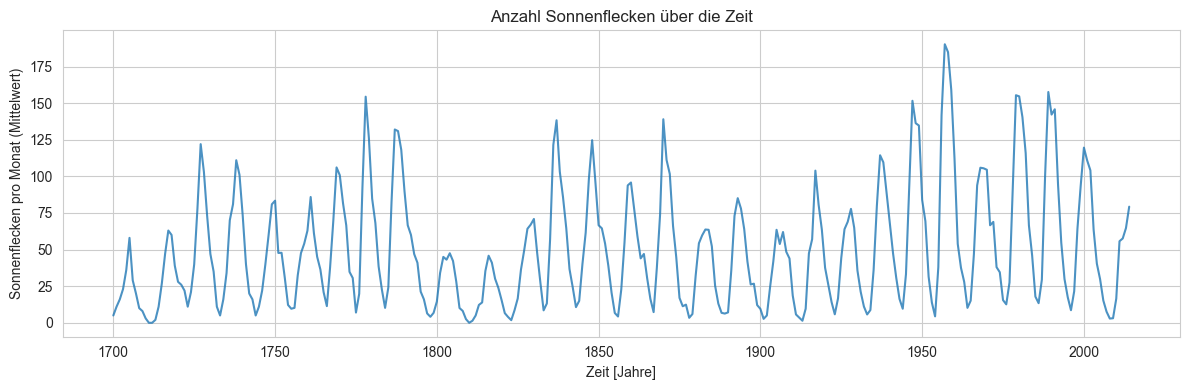

In [8]:
# Datei einlesen (tab-getrennt, mehrere Paare pro Zeile)
data = np.loadtxt("Daten/sunspots.txt", delimiter="\t")

# Jetzt sind die Daten 2D: jede Zeile hat z.B. [year1, val1, year2, val2, ..., yearN, valN]
# Wir machen daraus zwei Arrays:
years = data[:, ::2].flatten()       # Alle geraden Spalten (Jahre)
sunspots = data[:, 1::2].flatten()   # Alle ungeraden Spalten (Werte)

# Vorschau der letzten 10 Werte
print(f"{years.shape=}, {sunspots.shape=}")
print(f"Letzte 5 Einträge years: {years[-5:]}")
print(f"Letzte 5 Einträge sunspots: {sunspots[-5:]}")

plt.figure(figsize=(12, 4))
sns.lineplot(x=years, y=sunspots, alpha=0.8)
plt.title("Anzahl Sonnenflecken über die Zeit")
plt.xlabel("Zeit [Jahre]")
plt.ylabel("Sonnenflecken pro Monat (Mittelwert)")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2a) Frequenzanalyse der Sonnenfleckendaten mittels FFT

### Aufgabe

Plotten Sie das Power-Spektrum und finden Sie die dominante Periodizität der Schwingung. Damit erhalten Sie eine Abschätzung auf die Dauer des Sonnenzyklus.

### Ziel

Zur Identifikation periodischer Strukturen in der Sonnenfleckenaktivität wird die diskrete Fourier-Transformation (DFT) der Zeitreihe durchgeführt. Das Power-Spektrum gibt Auskunft darüber, welche Frequenzanteile in den Daten besonders stark vertreten sind.

### Vorgehen

Zunächst wird die Samplingrate aus dem Zeitabstand der Datenpunkte bestimmt. Anschließend wird mit der Fast-Fourier-Transformation (`fft`) das Frequenzspektrum der Sonnenfleckenzahlen berechnet. Das sogenannte Power-Spektrum ergibt sich als Quadrat des Betrags der Fourier-Koeffizienten:

$$
P(f) = |\hat{f}(f)|^2
$$

Um das Spektrum korrekt zu interpretieren, werden nur die **positiven Frequenzen** ausgewertet.

Dominante Frequenz: 0.09206 (1/Jahr)
Geschätzte Periodizität des Sonnenzyklus: 10.86 Jahre


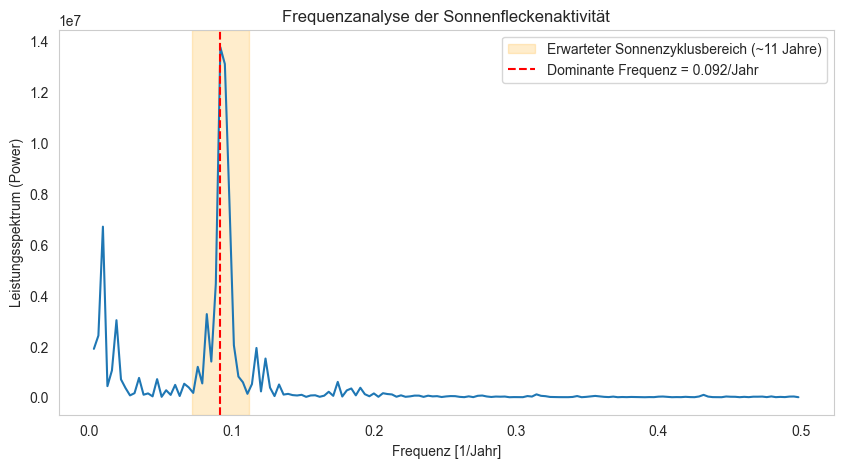

In [9]:
N = len(sunspots)
dt = years[1] - years[0]  # Zeitabstand, sollte konstant sein
freqs = fftfreq(N, dt)
fft_vals = fft(sunspots)
power = np.abs(fft_vals)**2

# Nur positive Frequenzen anzeigen
mask = freqs > 0

# Dominante Frequenz
dom_idx = np.argmax(power[mask])
dom_freq = freqs[mask][dom_idx]
dom_period = 1 / dom_freq
print(f"Dominante Frequenz: {dom_freq:.5f} (1/Jahr)")
print(f"Geschätzte Periodizität des Sonnenzyklus: {dom_period:.2f} Jahre")

delta = 0.02
plt.figure(figsize=(10, 5))
sns.lineplot(x=freqs[mask], y=power[mask])
plt.axvspan(dom_freq-delta, dom_freq+delta, color='orange', alpha=0.2, label="Erwarteter Sonnenzyklusbereich (~11 Jahre)")
plt.axvline(dom_freq, color='red', linestyle='--', label=f"Dominante Frequenz = {dom_freq:.3f}/Jahr")

plt.xlabel("Frequenz [1/Jahr]")
plt.ylabel("Leistungsspektrum (Power)")
plt.title("Frequenzanalyse der Sonnenfleckenaktivität")
plt.legend(loc="best")
plt.grid()

## 2b) Weitere Perioden im Fourier-Spektrum

### Aufgabe

Können Sie weitere Perioden in den Sonnenfleckendaten mithilfe des Fourier-Spektrums finden?

### Ziel

Neben der dominanten Frequenzkomponente im Bereich von ca. 11 Jahren sollen zusätzliche periodische Strukturen in der Sonnenfleckenaktivität identifiziert werden. Dies erfolgt durch eine Analyse signifikanter Peaks im Leistungsspektrum.

### Vorgehen

Mithilfe der Funktion `scipy.signal.find_peaks` werden lokale Maxima im Power-Spektrum bestimmt, deren Höhe über einer definierten Schwelle liegt. Solche Peaks weisen auf besonders ausgeprägte Frequenzanteile hin und ermöglichen Rückschlüsse auf charakteristische Perioden in der Zeitreihe.

### Ergebnisse

Folgende signifikante Perioden wurden im Power-Spektrum identifiziert (aufsteigend sortiert):

- ~8.08 Jahre  
- ~8.51 Jahre  
- ~10.86 Jahre  
- ~12.12 Jahre  
- ~13.12 Jahre  
- ~52.50 Jahre  
- ~105.00 Jahre  

Die bekannteste davon ist der Sonnenzyklus mit rund 11 Jahren, der hier durch mehrere benachbarte Peaks bestätigt wird. Darüber hinaus deuten die Perioden bei ~52 und ~105 Jahren auf langfristige Schwankungen hin – möglicherweise im Zusammenhang mit bekannten mehrdekadischen Phänomenen wie dem **Gleissberg-Zyklus**.

### Interpretation

Die Analyse zeigt, dass die Sonnenfleckenaktivität nicht nur durch einen einzelnen dominanten Zyklus geprägt ist, sondern sich aus einer Überlagerung mehrerer periodischer Komponenten zusammensetzt – darunter sowohl kurz- als auch langfristige Zyklen.  

Die Fourier-Transformation erweist sich damit als effektives Werkzeug, um verborgene Frequenzstrukturen in komplexen Zeitreihen wie diesen zu erkennen und zu quantifizieren.

Weitere signifikante Perioden:
  ~8.08 Jahre
  ~8.51 Jahre
  ~10.86 Jahre
  ~12.12 Jahre
  ~13.12 Jahre
  ~52.50 Jahre
  ~105.00 Jahre


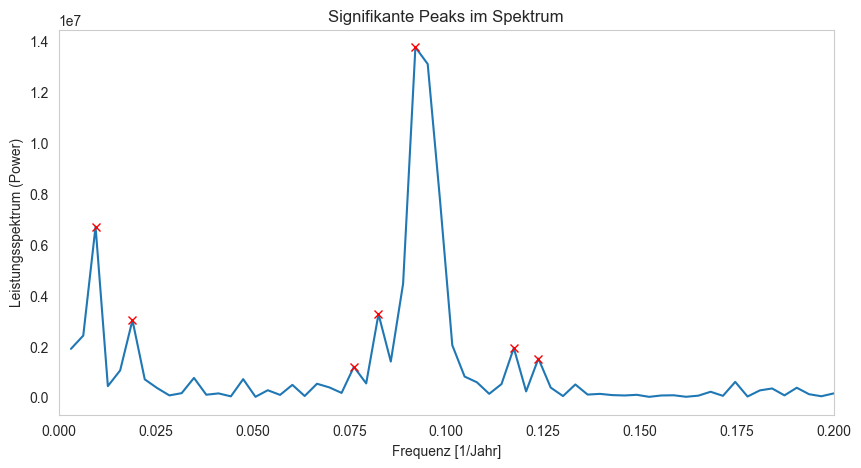

In [10]:
peaks, _ = find_peaks(power[mask], height=1e6)  # Schwelle anpassen je nach Skala
peak_freqs = freqs[mask][peaks]
peak_periods = 1 / peak_freqs

print("Weitere signifikante Perioden:")
for p in sorted(peak_periods, reverse=False):
    print(f"  ~{p:.2f} Jahre")

# Optional plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=freqs[mask], y=power[mask])
plt.plot(peak_freqs, power[mask][peaks], "rx")
plt.xlim(0, 0.2)
plt.title("Signifikante Peaks im Spektrum")
plt.xlabel("Frequenz [1/Jahr]")
plt.ylabel("Leistungsspektrum (Power)")

plt.grid()
plt.show()

## 2c) Manipulation des Fourier-Spektrums: Rücktransformation nach Frequenzfilterung

### Aufgabe

Entfernen Sie ausgewählte Komponenten im Fourier-Spektrum und rekonstruieren Sie anschließend das Zeitraumsignal. Analysieren Sie, welche Auswirkungen das gezielte Beibehalten bzw. Entfernen von niedrigen oder hohen Frequenzen auf das rekonstruierte Signal hat.

### Ziel

Die Fourier-Koeffizienten enthalten Informationen über die Frequenzanteile des Signals. Durch das gezielte Nullsetzen bestimmter Bereiche des Spektrums kann man das Verhalten des Signals im Zeitbereich gezielt verändern:

- **Nur tieffrequente Anteile (k ≤ 20):** Glättung, langfristige Struktur
- **Nur hochfrequente Anteile (k ≥ 5):** Details, schnelle Schwankungen

---

### Vorgehen

Zunächst wird die FFT des Originalsignals berechnet. Anschließend werden zwei Varianten erstellt:

- **Tiefpassfilterung:** Alle Frequenzanteile mit Index $k > 20$ (und ihre Spiegelanteile) werden entfernt.
- **Hochpassfilterung:** Die kleinsten Frequenzanteile (k < 5) werden auf null gesetzt, um langsame Schwankungen zu eliminieren.

### Ergebnisse & Interpretation

Die beiden folgenden Abbildungen zeigen die Auswirkungen gezielter Frequenzfilterung auf die Sonnenfleckendaten:

- **Tiefpassfilterung (k ≤ 20):**  
  Durch das Entfernen höherer Frequenzanteile wird das Signal deutlich geglättet. Die schnellen, zyklischen Schwankungen verschwinden, während der **langfristige Verlauf der Sonnenaktivität** erhalten bleibt.  
  In der resultierenden Kurve erkennt man deutlich den **allgemeinen Trendverlauf**, inklusive mehrdekadischer Maxima und Minima. Diese Art der Filterung ist besonders nützlich zur Analyse **langfristiger klimatischer oder astrophysikalischer Zyklen**.

- **Hochpassfilterung (k ≥ 5):**  
  Hier werden die niedrigfrequenten Komponenten – also **langsame Trendanteile** – entfernt. Das resultierende Signal enthält überwiegend **kurzfristige, hochfrequente Schwankungen**.  
  Diese Darstellung hebt feine Modulationen und unregelmäßige Abweichungen vom idealen Zyklus hervor, die z. B. auf **kurzfristige Ereignisse oder Störungen im Sonnenverhalten** hinweisen könnten. Der charakteristische 11-Jahres-Zyklus ist hingegen kaum mehr erkennbar.

**Fazit:**  
Die Modifikation des Frequenzspektrums durch gezieltes Entfernen bestimmter Komponenten ermöglicht eine **selektive Betrachtung von Struktur und Detail** innerhalb der Zeitreihe.  
Während Tiefpassfilterung hilft, globale Muster zu erkennen, erlaubt die Hochpassfilterung die Analyse schneller Schwankungen. Beide Sichtweisen ergänzen sich in der umfassenden Interpretation der Sonnenfleckenaktivität.


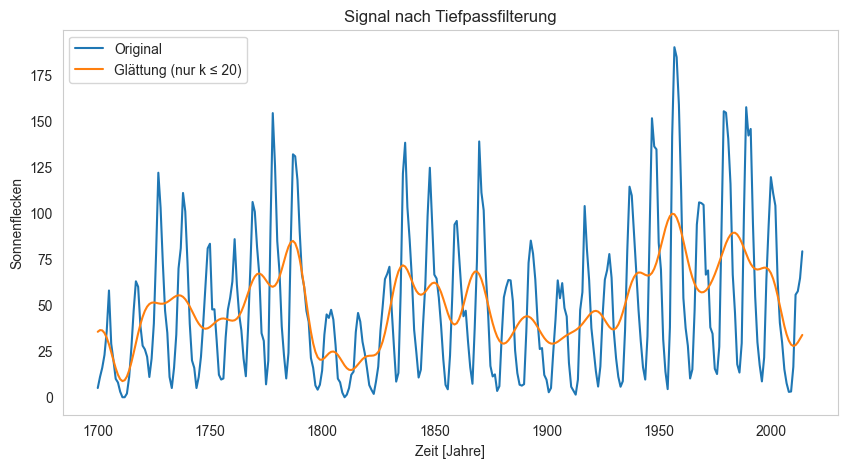

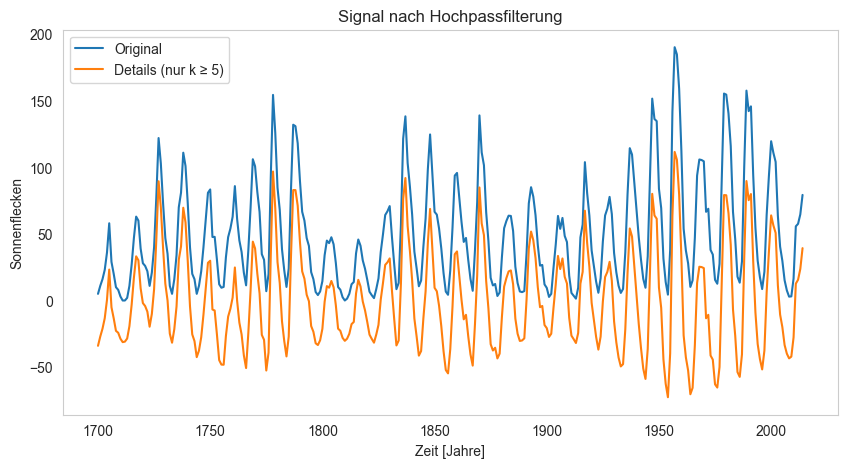

In [11]:

# Tiefpassfilterung: Nur k ≤ 20
fft_cut_high = fft_vals.copy()
fft_cut_high[21:-21] = 0  # Hohe Frequenzen entfernen
sunspots_smooth = np.real(np.fft.ifft(fft_cut_high))

plt.figure(figsize=(10, 5))
sns.lineplot(x=years, y=sunspots, label="Original")
plt.plot(years, sunspots_smooth, label="Glättung (nur k ≤ 20)")
plt.legend()
plt.title("Signal nach Tiefpassfilterung")
plt.xlabel("Zeit [Jahre]")
plt.ylabel("Sonnenflecken")
plt.grid()
plt.show()

# Hochpassfilterung: Nur k ≥ 5
fft_cut_low = fft_vals.copy()
fft_cut_low[:5] = 0
fft_cut_low[-4:] = 0  # Symmetrische Spiegelanteile
sunspots_detail = np.real(np.fft.ifft(fft_cut_low))

plt.figure(figsize=(10, 5))
sns.lineplot(x=years, y=sunspots, label="Original")
plt.plot(years, sunspots_detail, label="Details (nur k ≥ 5)")
plt.legend()
plt.title("Signal nach Hochpassfilterung")
plt.xlabel("Zeit [Jahre]")
plt.ylabel("Sonnenflecken")
plt.grid()
plt.show()

## 2d) Vergleich mit Aufgabe 1: Synthetische vs. reale Daten

### Vergleich der Fourier-Analyse in Aufgabe 1 (synthetisch) und Aufgabe 2 (reale Sonnenfleckendaten)

| Vergleichspunkt         | Aufgabe 1 (synthetisch)                       | Aufgabe 2 (reale Daten)                        |
|-------------------------|----------------------------------------------|------------------------------------------------|
| **Signalart**           | Glatt, exakt periodisch, analytisch gegeben  | Reale Messdaten, verrauscht, quasiperiodisch   |
| **Fourier-Koeffizienten** | Exakt berechenbar, symmetrisch, komplex     | FFT-basiert, unsymmetrisch, spektral breiter   |
| **Konvergenzverhalten** | Sehr schnell, besonders bei glatten Funktionen | Langsamer, durch Rauschen und Diskontinuitäten |
| **Ziel & Anwendung**    | Theoretische Approximation und Visualisierung | Analyse, Filterung, Periodendetektion          |

---

### Fazit

- Die Fourier-Analyse bei analytischen Funktionen (Aufgabe 1) liefert klare, symmetrische Koeffizienten mit schnellem Konvergenzverhalten.
- Bei realen Zeitreihen (Aufgabe 2) ist das Spektrum komplexer: Es enthält **Rauschen**, **mehrere Perioden** und oft **asymmetrische Verteilungen**.
- Die **Fast Fourier Transform (FFT)** ist dennoch ein mächtiges Werkzeug zur Frequenzanalyse, insbesondere zur **Erkennung dominanter Zyklen**, wie etwa des ca. **11-jährigen Sonnenfleckenzyklus**.
- Die **gezielte Filterung** (Hoch-/Tiefpass) verdeutlicht, wie bestimmte Frequenzbereiche das Signal formen:  
  Tieffrequente Anteile repräsentieren **langsame Trends**, hochfrequente dagegen **Details oder Störungen**.

Die Fourier-Analyse ermöglicht somit nicht nur die mathematische Zerlegung, sondern auch die **gezielte Interpretation und Bearbeitung realer Signale** – ein zentrales Werkzeug in der Datenanalyse.

# Aufgabe 3

## Einlesen und Aufbereitung der Daten



In [24]:
# Laden der Musikdatei
#audio_data, sample_rate = librosa.load("Daten/music.wav")

audio_data, sample_rate = sf.read("Daten/music.wav")

# Metadaten: Shape, Länge [s], Sample Rate [Hz]
print(f"Shape: {audio_data.shape}")
duration = len(audio_data) / sample_rate
print(f"Länge: {duration:.2f} Sekunden")
print(f"Sample rate: {sample_rate} Hz")

# Check for Channels
if audio_data.ndim > 1:
    print("Audio is stereo, converting to mono.")
    audio_data = audio_data.mean(axis=1)  # Konvertiere zu Mono
else:
    print("Audio already mono.")

# Audio abspielen
Audio(audio_data, rate=sample_rate)

Shape: (157173, 2)
Länge: 3.56 Sekunden
Sample rate: 44100 Hz
Audio is stereo, converting to mono.


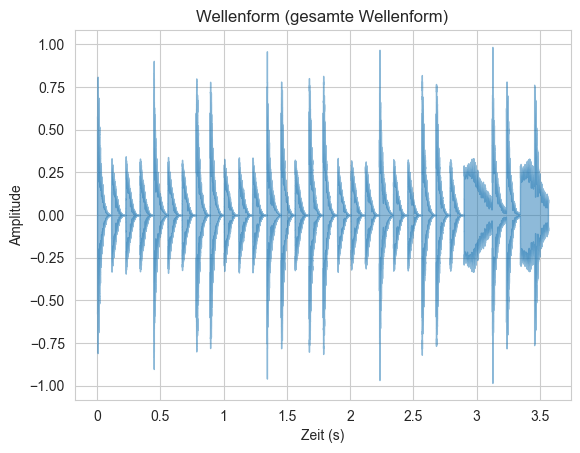

In [26]:
# Anzeige der Wellenform der Musikdatei
librosa.display.waveshow(audio_data, sr=sample_rate, alpha=0.5)
plt.title("Wellenform (gesamte Wellenform)")
plt.ylabel("Amplitude")
plt.xlabel("Zeit (s)")
plt.show()

## 3a) Warum ist das Spektrum symmetrisch?

Weil das Signal reellwertig ist, gilt:
$X(-f) = \overline{X(f)}$

Daher ist der Betrag (Amplitude) symmetrisch um f=0f=0. Bei realen Signalen ist das immer der Fall.

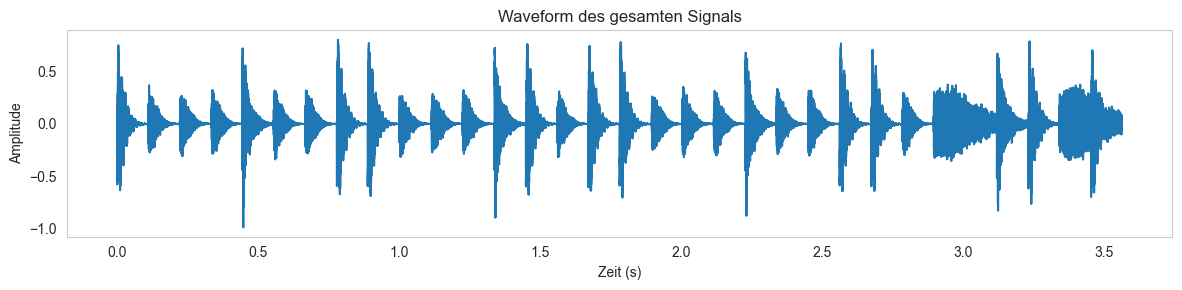

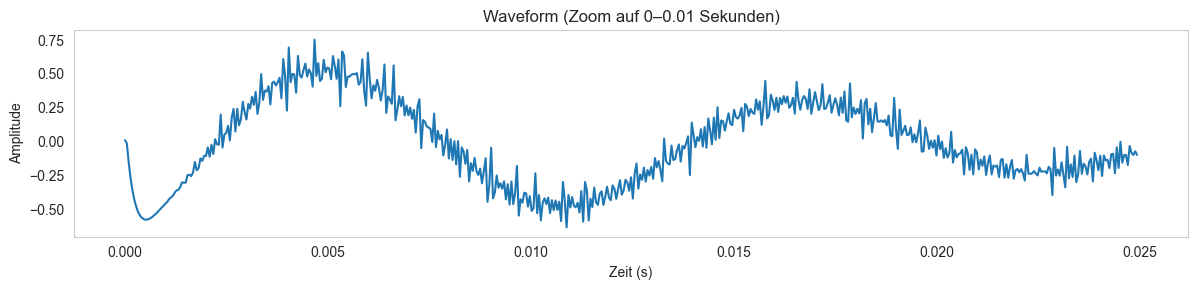

In [13]:
time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

plt.figure(figsize=(12, 3))
plt.plot(time, audio_data)
plt.title("Waveform des gesamten Signals")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Zoom (z.B. erste 0.01 s)
zoom_range = int(sample_rate * 0.025)

plt.figure(figsize=(12, 3))
plt.plot(time[:zoom_range], audio_data[:zoom_range])
plt.title("Waveform (Zoom auf 0–0.01 Sekunden)")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

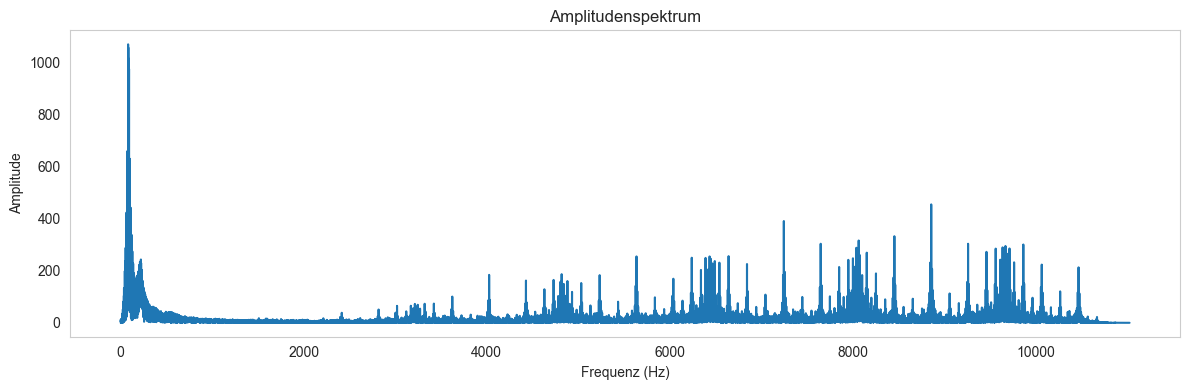

In [14]:
N = len(audio_data)
freqs = fftfreq(N, d=1/sample_rate)
fft_vals = fft(audio_data)
amplitude = np.abs(fft_vals)

mask = freqs >= 0  # nur positive Frequenzen

plt.figure(figsize=(12, 4))
plt.plot(freqs[mask], amplitude[mask])
plt.title("Amplitudenspektrum")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

## 3b)

In [15]:
# Grenzfrequenz in Hz
cutoff = 2000

low_mask = (freqs >= 0) & (freqs < cutoff)
high_mask = (freqs >= cutoff)

# Top 5 Frequenzen unterhalb von 2kHz
top_low_indices = np.argsort(amplitude[low_mask])[-5:]
top_low_freqs = freqs[low_mask][top_low_indices]

# Top 5 Frequenzen oberhalb von 2kHz
top_high_indices = np.argsort(amplitude[high_mask])[-5:]
top_high_freqs = freqs[high_mask][top_high_indices]

print("Top 5 Frequenzen < 2kHz:", np.round(top_low_freqs, 2))
print("Top 5 Frequenzen ≥ 2kHz:", np.round(top_high_freqs, 2))


Top 5 Frequenzen < 2kHz: [71.83 90.91 89.79 81.93 80.81]
Top 5 Frequenzen ≥ 2kHz: [9260.01 8064.73 8454.74 7246.84 8857.37]


## 3c)

In [16]:
# Kopien vorbereiten
fft_low = np.zeros_like(fft_vals)
fft_high = np.zeros_like(fft_vals)

# Frequenzen maskieren
fft_low[low_mask] = fft_vals[low_mask]
fft_low[-sum(low_mask):] = fft_vals[-sum(low_mask):]  # Spiegel

fft_high[high_mask] = fft_vals[high_mask]
fft_high[-sum(high_mask):] = fft_vals[-sum(high_mask):]  # Spiegel

# Rücktransformation
reconstructed_low = np.real(np.fft.ifft(fft_low))
reconstructed_high = np.real(np.fft.ifft(fft_high))


def relative_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

error_low = relative_error(audio_data, reconstructed_low)
error_high = relative_error(audio_data, reconstructed_high)

print(f"Relativer Fehler (<2kHz): {error_low:.4%}")
print(f"Relativer Fehler (≥2kHz): {error_high:.4%}")


Relativer Fehler (<2kHz): 57.8325%
Relativer Fehler (≥2kHz): 43.6123%


In [17]:
sf.write("Daten/output/output_low.wav", reconstructed_low, sample_rate)
sf.write("Daten/output/output_high.wav", reconstructed_high, sample_rate)

## 4a)

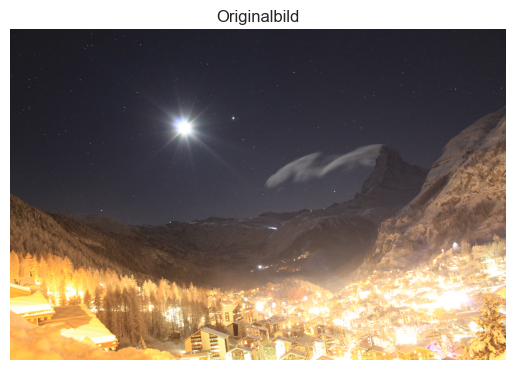

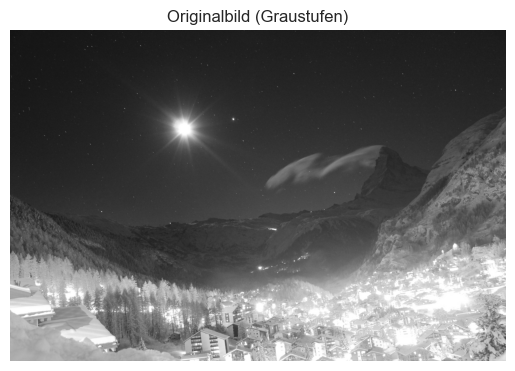

In [18]:
# Bild laden
img = mpimg.imread("Daten/img.jpg")
if img.dtype != np.float32 and img.dtype != np.float64:
    img = img / 255.0

# Falls es ein Farb-Bild ist (RGB), umwandeln in Graustufen
if img.ndim == 3:
    img_gray = img.mean(axis=2)
else:
    img_gray = img

# Anzeigen
plt.imshow(img)
plt.axis('off')
plt.title("Originalbild")
plt.show()

plt.imshow(img_gray, cmap='gray')
plt.title("Originalbild (Graustufen)")
plt.axis("off")
plt.show()

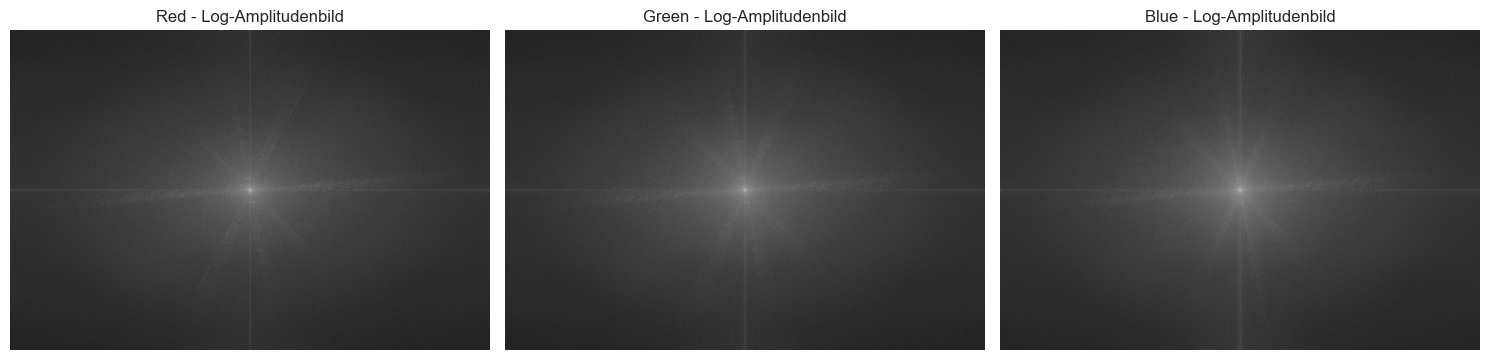

In [19]:
def plot_fft_amplitude_rgb(image_rgb):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    channels = ['Red', 'Green', 'Blue']

    for i in range(3):
        F = fftshift(fft2(image_rgb[:, :, i]))
        magnitude = np.abs(F)
        axes[i].imshow(np.log1p(magnitude), cmap='gray')
        axes[i].set_title(f"{channels[i]} - Log-Amplitudenbild")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

plot_fft_amplitude_rgb(img)

In [20]:
thresholds = [0.00001, 0.0001, 0.001, 0.01, 0.1]  # relative Amplituden-Schwellen

def filter_fft_rgb(img_rgb, threshold):
    reconstructed = np.zeros_like(img_rgb)
    spectrum_display = []

    for i in range(3):
        F = fft2(img_rgb[:, :, i])
        F_shift = fftshift(F)
        mag = np.abs(F_shift)
        max_val = mag.max()

        # Schwellenwertmaske
        mask = mag >= threshold * max_val
        F_filtered = F_shift * mask
        spectrum_display.append(np.log1p(np.abs(F_filtered)))

        # Rück-Transformation
        F_inv = ifft2(ifftshift(F_filtered))
        reconstructed[:, :, i] = np.real(F_inv)

    return np.clip(reconstructed, 0, 1), spectrum_display


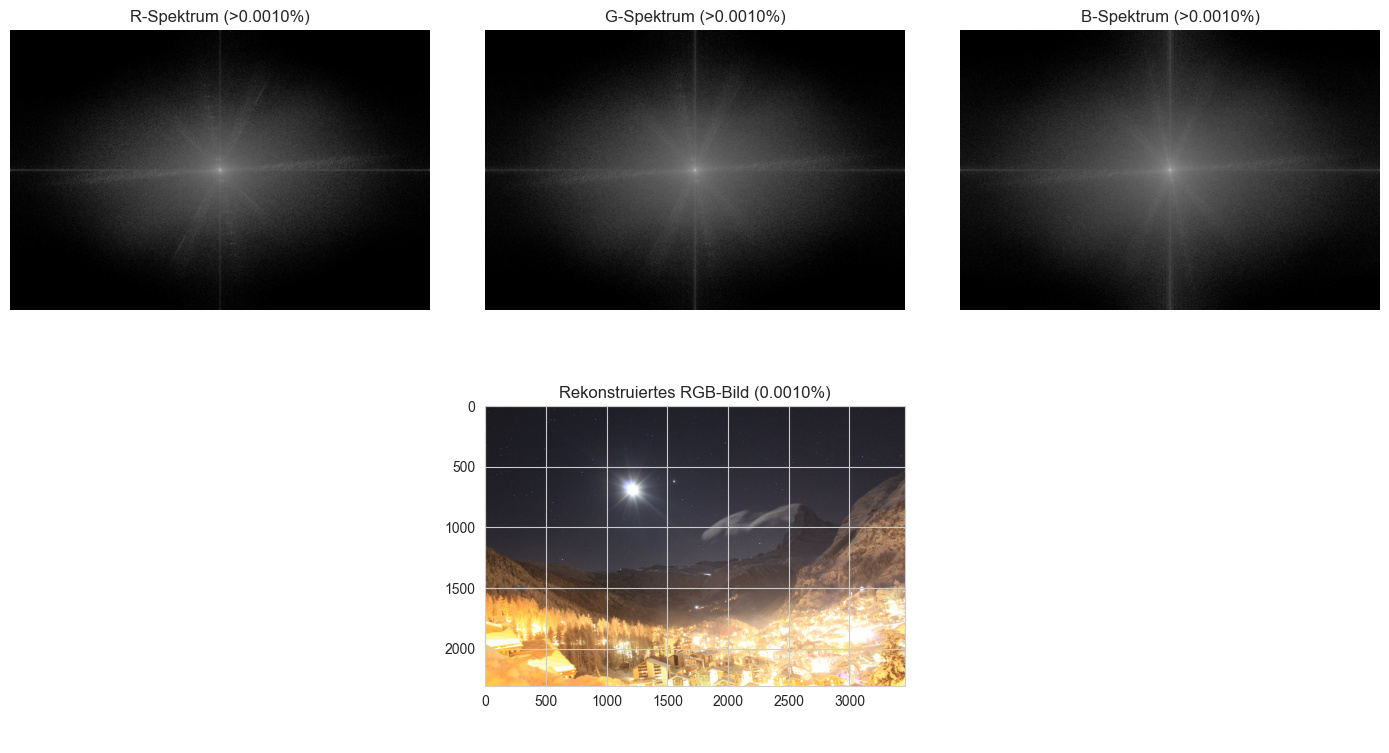

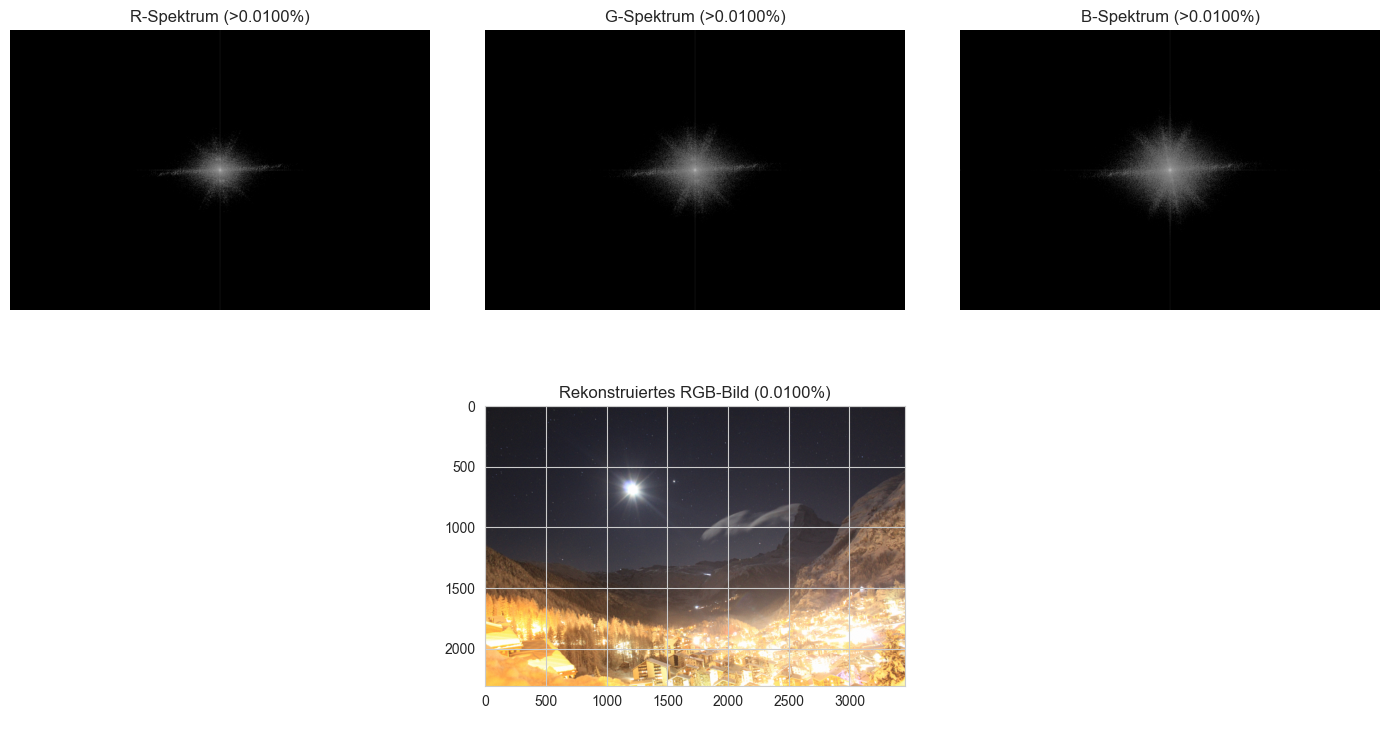

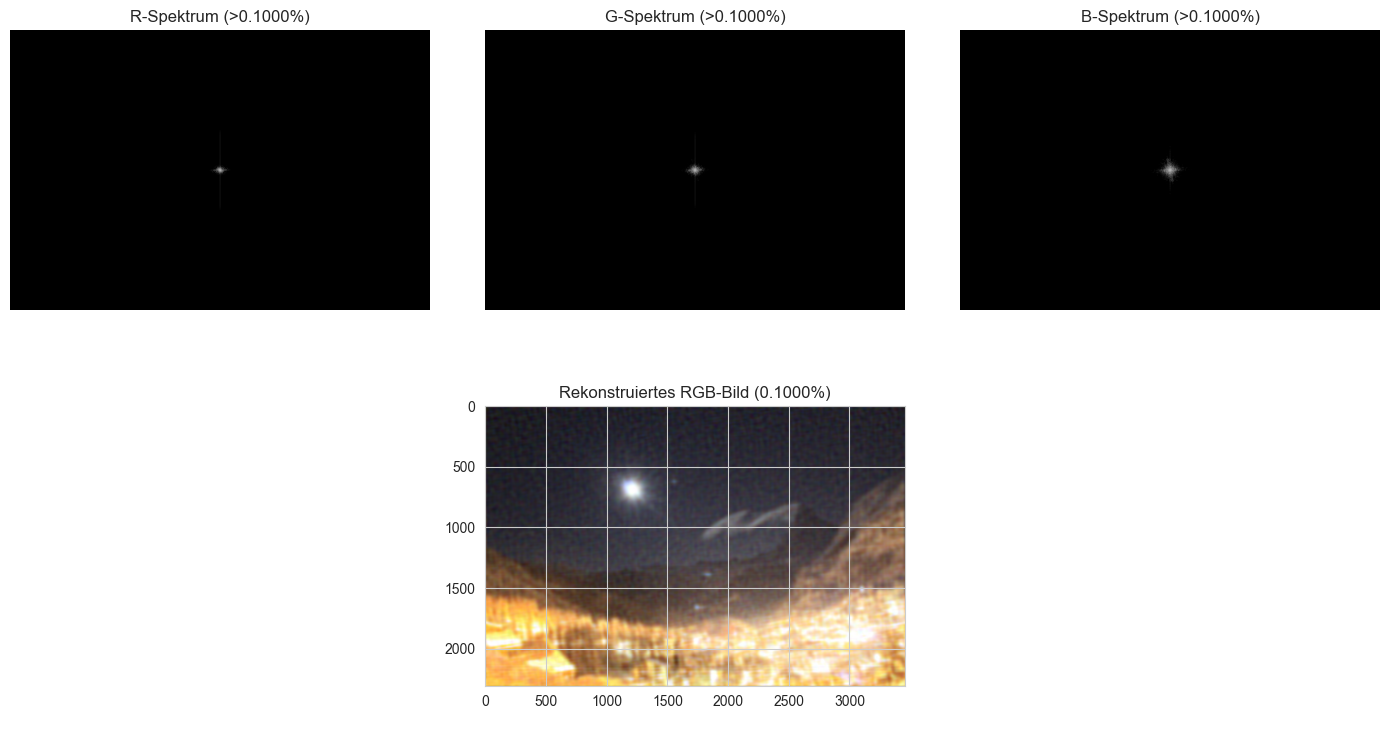

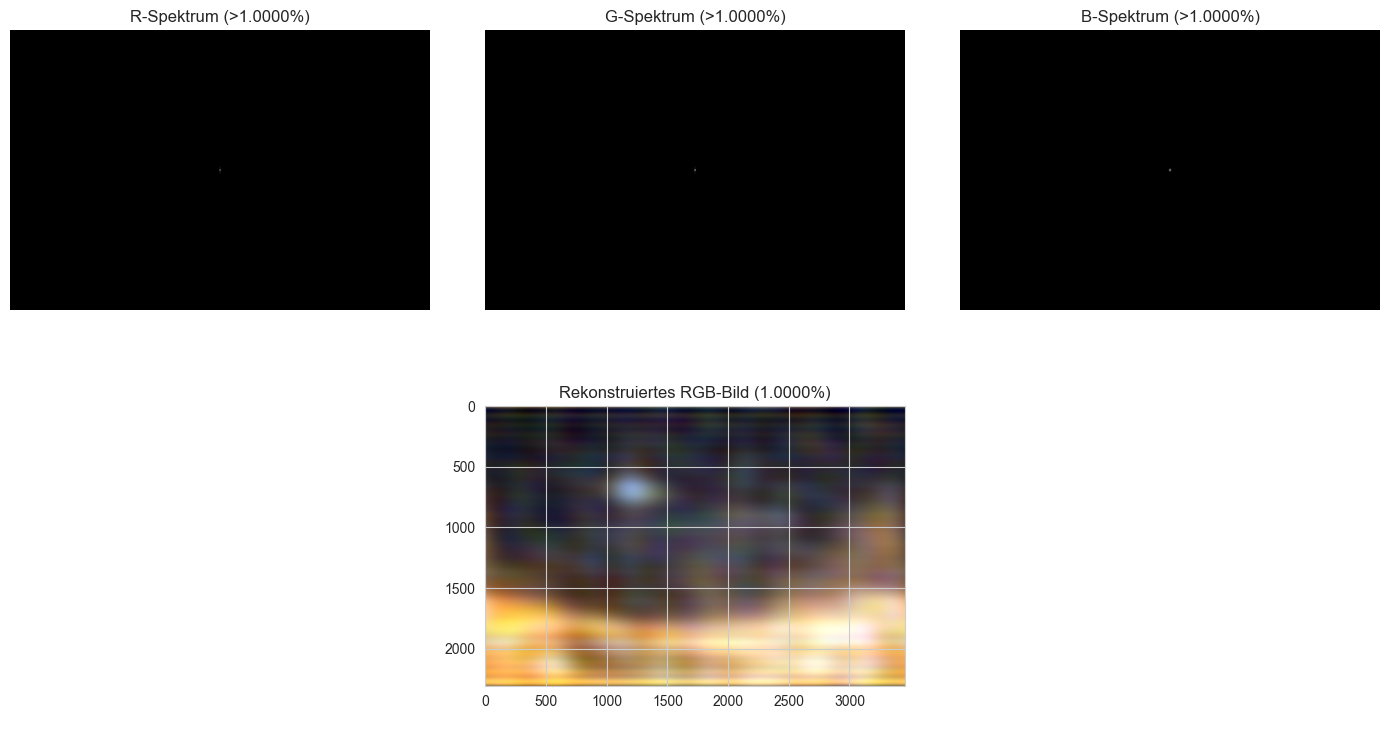

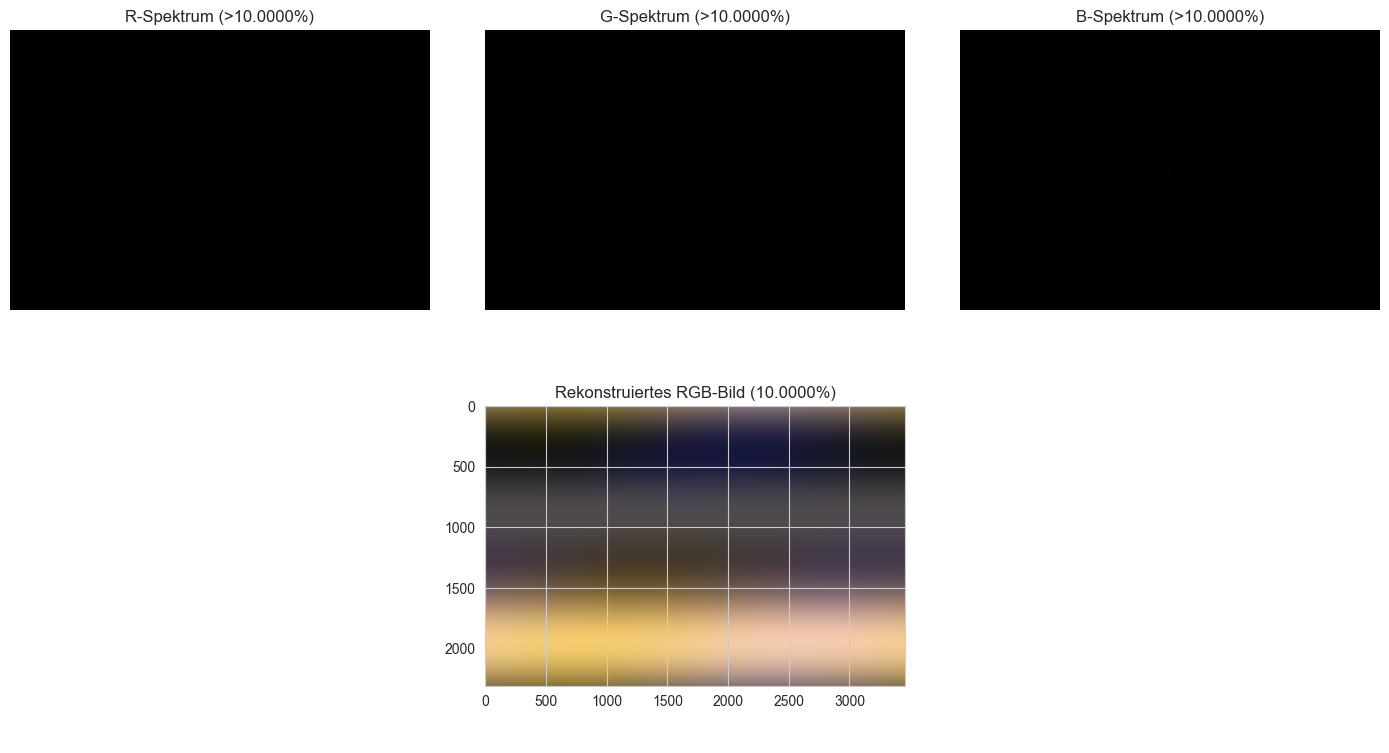

In [21]:
for t in thresholds:
    recon_img, spectra = filter_fft_rgb(img, t)

    fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    for i, channel in enumerate(['R', 'G', 'B']):
        axes[0, i].imshow(spectra[i], cmap='gray')
        axes[0, i].set_title(f"{channel}-Spektrum (>{t*100:.4f}%)")
        axes[0, i].axis("off")

    axes[1, 1].imshow(recon_img)
    axes[1, 1].set_title(f"Rekonstruiertes RGB-Bild ({t*100:.4f}%)")
    axes[1, 0].axis("off")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()


In [22]:
def rel_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

print("Fehleranalyse pro Schwelle:")
for t in thresholds:
    recon, _ = filter_fft_rgb(img, t)
    err = rel_error(img, recon)
    print(f"Schwelle: {t*100:.4f}%, Fehler: {err:.4%}")


Fehleranalyse pro Schwelle:
Schwelle: 0.0010%, Fehler: 1.0084%
Schwelle: 0.0100%, Fehler: 4.2046%
Schwelle: 0.1000%, Fehler: 10.0619%
Schwelle: 1.0000%, Fehler: 17.4635%
Schwelle: 10.0000%, Fehler: 32.2213%
